In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 
import os
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, RandomFlip, RandomRotation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import confusion_matrix
import seaborn as sns

Found 2640 files belonging to 2 classes.
Found 564 files belonging to 2 classes.
Found 565 files belonging to 2 classes.


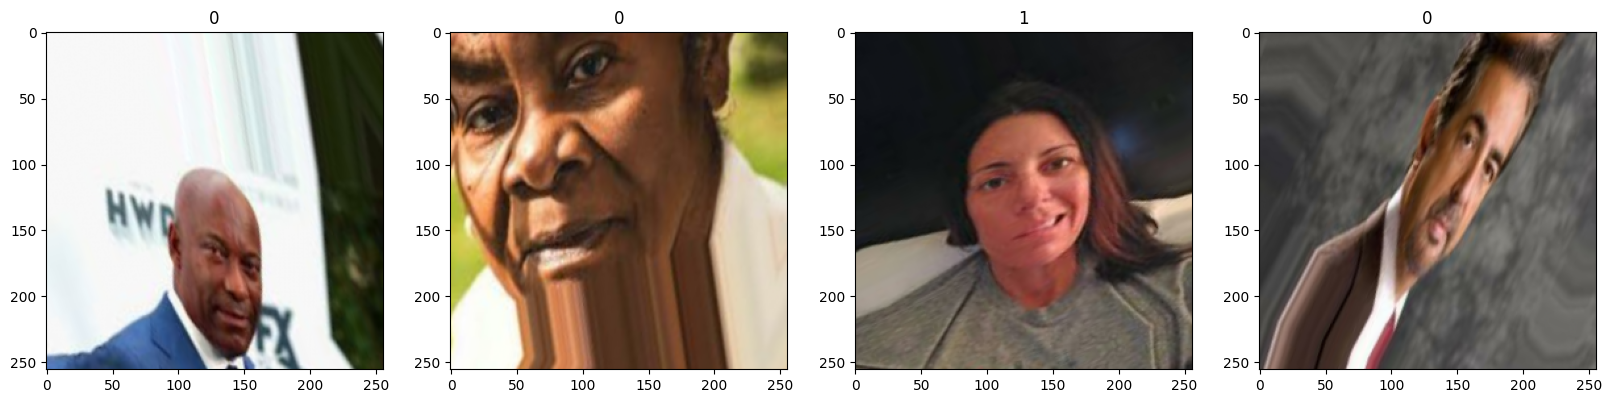

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
augmentation_layer = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1)
])
TrainingData = tf.keras.utils.image_dataset_from_directory(
    'Dataset/Train', batch_size=64, shuffle=True
).map(lambda x, y: (augmentation_layer(x / 255, training=True), y)).prefetch(AUTOTUNE)

ValidationData = tf.keras.utils.image_dataset_from_directory(
    'Dataset/Validate', batch_size=64, shuffle=True
).map(lambda x, y: (x / 255, y)).prefetch(AUTOTUNE)

TestingData = tf.keras.utils.image_dataset_from_directory(
    'Dataset/Test', batch_size=64, shuffle=False
).map(lambda x, y: (x / 255, y)).prefetch(AUTOTUNE)

DataIterator = TrainingData.as_numpy_iterator()
Batch = DataIterator.next()


Fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(Batch[0][:4]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(Batch[1][idx])

In [18]:
Model = Sequential()

# Block 1
Model.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(1e-4), input_shape=(256,256,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D())

# Block 2
Model.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(1e-4)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D())

# Block 3
Model.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(1e-4)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D())

# Block 4
Model.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(1e-4)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D())

Model.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(1e-4)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D())




# Fully Connected Layers
Model.add(Flatten())
Model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
Model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
Model.add(Dense(1, activation='sigmoid'))

# Compile
Model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])


/Users/mac/Downloads/UNI FUCKING VERSITY/AOL_AI/env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
LogDir = 'logs'
Tensorboard_Callback = TensorBoard(log_dir=LogDir)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

History = Model.fit(TrainingData, epochs=10, validation_data=ValidationData, callbacks=[Tensorboard_Callback, reduce_lr])

# LogDir='logs'
# Tensorboard_Callback = tf.keras.callbacks.TensorBoard(log_dir=LogDir)
# History = Model.fit(TrainingData, epochs=15, validation_data=ValidationData, callbacks=[Tensorboard_Callback])

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 344s 7s/step - accuracy: 0.8068 - loss: 0.5520 - val_accuracy: 0.3351 - val_loss: 0.9879 - learning_rate: 0.0010
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 213s 5s/step - accuracy: 0.9409 - loss: 0.1999 - val_accuracy: 0.3511 - val_loss: 1.0339 - learning_rate: 0.0010
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 251s 6s/step - accuracy: 0.9583 - loss: 0.1618 - val_accuracy: 0.5053 - val_loss: 1.0561 - learning_rate: 0.0010
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 253s 6s/step - accuracy: 0.9725 - loss: 0.1292 - val_accuracy: 0.5745 - val_loss: 0.8811 - learning_rate: 0.0010
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 292s 7s/step - accuracy: 0.9908 - loss: 0.0874 - val_accuracy: 0.6082 - val_loss: 1.1721 - learning_rate: 0.0010
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 207s 5s/step - accuracy: 0.9888 - loss: 0.0923 - val_accuracy: 0.6578 - val_loss: 2.0385 - learning_rate: 0.0010
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 193s 5s/step - accuracy: 0.9787 - loss: 0.1188 - val_acc

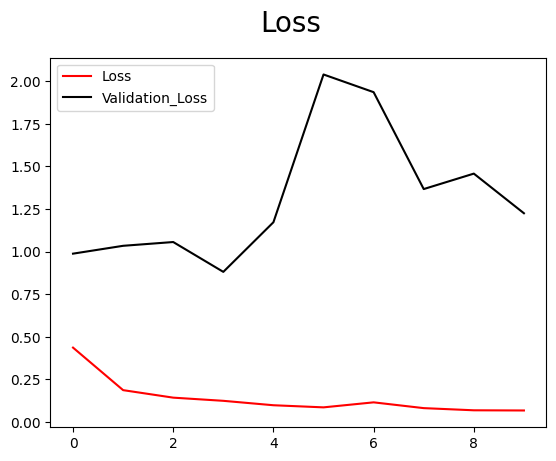

In [20]:
Fig = plt.figure()
plt.plot(History.history['loss'], color='red', label='Loss')
plt.plot(History.history['val_loss'], color='black', label='Validation_Loss')
Fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

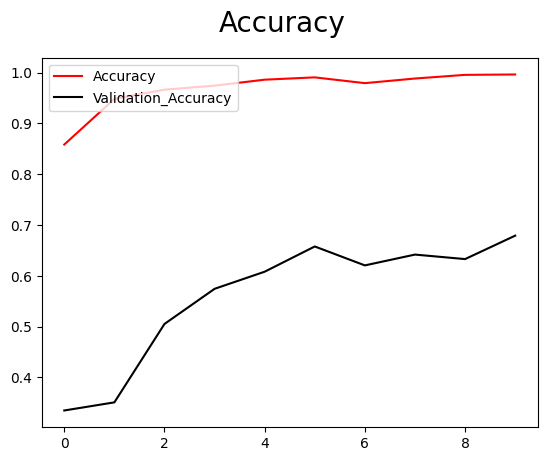

In [21]:
Fig = plt.figure()
plt.plot(History.history['accuracy'], color='red', label='Accuracy')
plt.plot(History.history['val_accuracy'], color='black', label='Validation_Accuracy')
Fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 492ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 493ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
Confusion Matrix:
[[304.  72.]
 [123.  66.]]


2024-12-23 05:20:38.436256: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


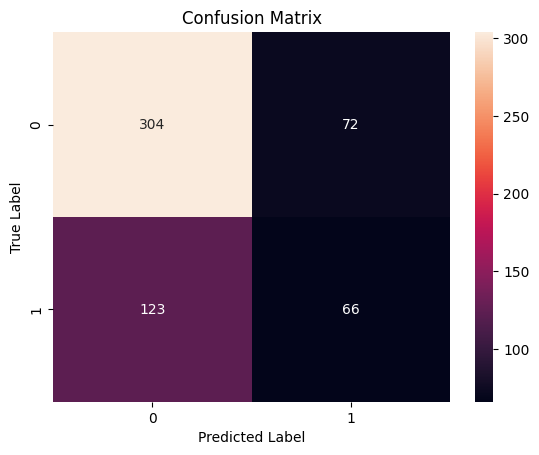

In [22]:
Precision = Precision()
Recall = Recall()
Accuracy = BinaryAccuracy()


cm = np.zeros((2, 2))

for Batch in TestingData.as_numpy_iterator():
    X, y = Batch
    yhat = Model.predict(X)
    
    Precision.update_state(y, yhat)
    Recall.update_state(y, yhat)
    Accuracy.update_state(y, yhat)

    cm += confusion_matrix(y, yhat.round())  




precision = Precision.result().numpy()
recall = Recall.result().numpy()
accuracy = Accuracy.result().numpy()


print("Confusion Matrix:")
print(cm)

class_labels = ["Normal", "Stroke"] 


cm_int = cm.astype(int)


sns.heatmap(cm_int, annot=True, fmt="d")  
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [23]:
print(f"Precision : {Precision.result()}, Recall : {Recall.result()}, Accuracy : {Accuracy.result()}")

Precision : 0.47826087474823, Recall : 0.3492063581943512, Accuracy : 0.6548672318458557


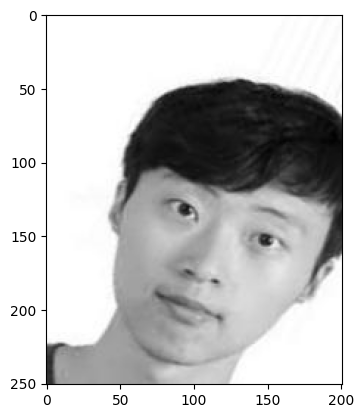

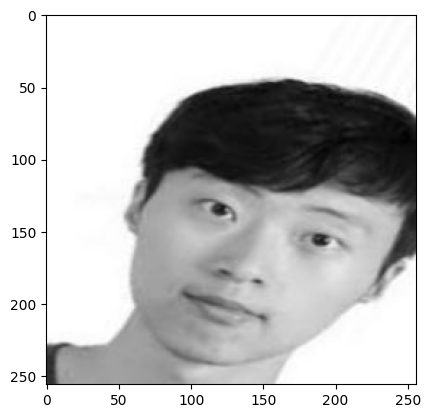

In [24]:
Img = cv2.imread('Dataset/Test/noStroke_data/aug_0_6935.jpg')
plt.imshow(Img)
plt.show()

ResizedImg = tf.image.resize(Img, (256,256))
plt.imshow(ResizedImg.numpy().astype(int))
plt.show()

In [25]:
yhat = Model.predict(np.expand_dims(ResizedImg / 255.0, axis=0))

print(yhat)

if(yhat == 0.78):
    print("Gak Stroke, ini anak goblok aja")
elif yhat > 0.50: 
    print('Predicted class is Stroke')
else:
    print('Predicted class is Normal')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[0.49884588]]
Predicted class is Normal


In [26]:
# Ensure the directory exists
os.makedirs('Models', exist_ok=True)

# Save the model
Model.save(os.path.join('Models', 'StrokeClassifier.keras'))